In [6]:
#考虑每个的颜色 （Hue）和饱和度（Saturation）。根据这两个特征绘制 2D 直方图。 
#OpenCV 中的 2D 直方图 
import cv2
import numpy as np
img=cv2.imread('../images/6.jpg')
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist=cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])

In [ ]:
#numpy 中 2D 直方图 
hist,xbins,ybins=np.histogram2d(h.ravel(),s.ravel(),[180,256].[[0,180],[0,256]])
#第一个参数是 H 通道，第二个参数是 S 通道，第三个参数是 bins 的数 目，第四个参数是数值范围。 

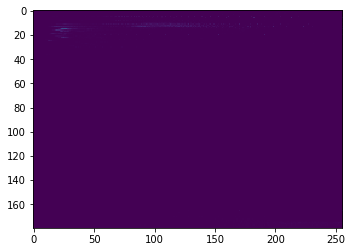

In [7]:
import matplotlib.pyplot as plt
plt.imshow(hist,interpolation='nearest')
plt.show()

In [11]:
# OpenCV 中的反向投影 
import cv2
import numpy as np
roi=cv2.imread('../images/AMD.jpg')
hsv=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target=cv2.imread('../images/green2.jpg')
hsvt=cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

In [12]:
#计算目标直方图
roihist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
#归一化，参数为原图像和输出图像，归一化后值全部在2到255范围
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

#卷积连接分散的点
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dst = cv2.filter2D(dst,-1,disc)

ret,thresh = cv2.threshold(dst,50,255,0)
#使用merge变成通道图像
thresh = cv2.merge((thresh,thresh,thresh))

#蒙板
res = cv2.bitwise_and(target,thresh)
#矩阵按列合并,就是把target,thresh和res三个图片横着拼在一起
res = np.hstack((target,thresh,res))

cv2.imwrite('../images/res2.jpg',res)
#显示图像
cv2.imshow('1',res)
cv2.waitKey(0)

-1

In [13]:
print(roi.shape)

(190, 454, 3)


In [3]:
print(target.shape)

(300, 300, 3)


In [7]:
re=cv2.resize(target,(190,454),interpolation=cv2.INTER_CUBIC)
cv2.imwrite('../images/green2.jpg',re)

True

In [ ]:
#python+OpenCV 鼠标交互图片切割矩形区域

In [1]:
import cv2

global img
global point1, point2
def on_mouse(event, x, y, flags, param):
    global img, point1, point2
    img2 = img.copy()
    if event == cv2.EVENT_LBUTTONDOWN:         #左键点击
        point1 = (x,y)
        cv2.circle(img2, point1, 10, (0,255,0), 5)
        cv2.imshow('image', img2)
    elif event == cv2.EVENT_MOUSEMOVE and (flags & cv2.EVENT_FLAG_LBUTTON):               #按住左键拖曳
        cv2.rectangle(img2, point1, (x,y), (255,0,0), 5)
        cv2.imshow('image', img2)
    elif event == cv2.EVENT_LBUTTONUP:         #左键释放
        point2 = (x,y)
        cv2.rectangle(img2, point1, point2, (0,0,255), 5) 
        cv2.imshow('image', img2)
        min_x = min(point1[0],point2[0])     
        min_y = min(point1[1],point2[1])
        width = abs(point1[0] - point2[0])
        height = abs(point1[1] -point2[1])
        cut_img = img[min_y:min_y+height, min_x:min_x+width]
        cv2.imwrite('../images/lena.jpg', cut_img)

def main():
    global img
    img=cv2.imread('../images/29.jpg')
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_mouse)
    cv2.imshow('image', img)
    cv2.waitKey(0)

if __name__ == '__main__':
    main()

